Let's look at the catalogs generated by the corrected vs. uncorrected diffims...

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
import lsst.daf.persistence as dp
if False:
    butler=dp.Butler('decamDirTest')
    sources=butler.get('deepDiff_diaSrc',visit=289820,ccdnum=11)
    #print sources[0].extract('ip_diffim_Naive*')

if False:
# df1 will be the corrected one.
    df1 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
    #df1.head()

if False:
# df2 will be the corrected one.
    df2 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
    #df2.head()

# Now let's save them out...
if False:
    import cPickle
    import gzip
    cPickle.dump((df1, df2), gzip.GzipFile('twoCatalogs.p.gz', 'wb'))

In [3]:
import cPickle
import gzip

df1, df2 = cPickle.load(gzip.GzipFile('twoCatalogs.p.gz', 'rb'))
print df1.shape, df2.shape
#print df1.columns.values

(47, 133) (143, 133)


143 143


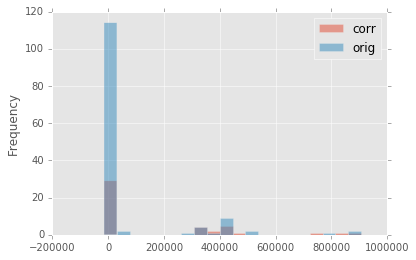

In [4]:
#print df1.columns.values
fluxes1 = df1.base_CircularApertureFlux_50_0_flux
fluxes2 = df2.base_CircularApertureFlux_50_0_flux
fluxes1 = np.append(fluxes1, np.repeat(np.nan, len(fluxes2)-len(fluxes1)))
print len(fluxes2),len(fluxes1)
df = pd.DataFrame({'corr': fluxes1, 'orig': fluxes2})
df.plot.hist(alpha=0.5, bins=20)

Find matches between the two catalogs in RA and Dec.

0.00174137799121 (18, 48) 0.00174137799121
-0.104489022363 2.71678934598 	-0.104489013982 2.71678934699
45
0.0063943728011 -0.104245305196 2.71568871571 	-0.104245278038 2.71568870076
[   0.95530517  633.50516061]
0.958343834091
[  1.36690000e+00   8.12847137e+04]


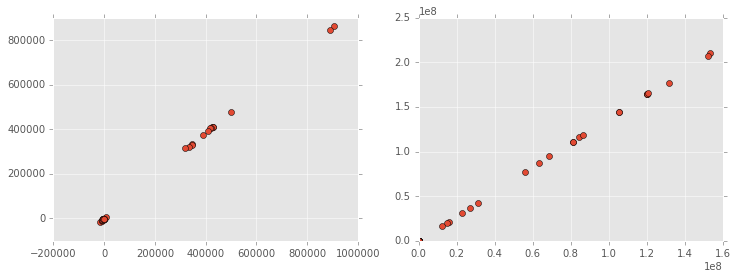

In [5]:
dist = np.sqrt(np.add.outer(df1.coord_dec, -df2.coord_dec)**2. + \
               np.add.outer(df1.coord_ra, -df2.coord_ra)**2.) * 206264.806247  # convert to arcsec ?
print dist.min(), np.unravel_index(np.argmin(dist), dist.shape), dist[18,48]
print df1.iloc[18].coord_dec, df1.iloc[18].coord_ra, '\t', df2.iloc[48].coord_dec, df2.iloc[48].coord_ra
print np.sum(dist < 4.)
matches = np.where(dist < 4.)
#print matches
print dist[0,0], df1.iloc[0].coord_dec, df1.iloc[0].coord_ra, '\t', df2.iloc[0].coord_dec, df2.iloc[0].coord_ra

matches1 = df1.iloc[matches[0]]
matches2 = df2.iloc[matches[1]]

fluxes1 = matches1.base_CircularApertureFlux_50_0_flux.values
fluxes2 = matches2.base_CircularApertureFlux_50_0_flux.values

fluxSigs1 = matches1.base_CircularApertureFlux_50_0_fluxSigma.values
fluxSigs2 = matches2.base_CircularApertureFlux_50_0_fluxSigma.values

isgood = ~np.isnan(fluxes1) & ~np.isnan(fluxes2)
isgood2 = ~np.isnan(fluxes1) & ~np.isnan(fluxes2) & ~np.isnan(fluxSigs1) & ~np.isnan(fluxSigs2)

fluxes1 = fluxes1[isgood]
fluxes2 = fluxes2[isgood]
print np.polyfit(fluxes2, fluxes1, deg=1)
#print pearsonr(fluxes2, fluxes1)
print np.mean(fluxes1/fluxes2)

fluxSigs1 = fluxSigs1[isgood2]
fluxSigs2 = fluxSigs2[isgood2]
print np.polyfit(fluxSigs2, fluxSigs1, deg=1)
#print pearsonr(fluxSigs2, fluxSigs1)

plt.figure(1, (12,4))
plt.subplot(121)
plt.plot(fluxes2, fluxes1, 'o')
plt.subplot(122)
plt.plot(fluxSigs2, fluxSigs1, 'o')

In [6]:
df1.columns.values

array(['base_CircularApertureFlux_12_0_flag',
       'base_CircularApertureFlux_12_0_flag_apertureTruncated',
       'base_CircularApertureFlux_12_0_flux',
       'base_CircularApertureFlux_12_0_fluxSigma',
       'base_CircularApertureFlux_17_0_flag',
       'base_CircularApertureFlux_17_0_flag_apertureTruncated',
       'base_CircularApertureFlux_17_0_flux',
       'base_CircularApertureFlux_17_0_fluxSigma',
       'base_CircularApertureFlux_25_0_flag',
       'base_CircularApertureFlux_25_0_flag_apertureTruncated',
       'base_CircularApertureFlux_25_0_flux',
       'base_CircularApertureFlux_25_0_fluxSigma',
       'base_CircularApertureFlux_35_0_flag',
       'base_CircularApertureFlux_35_0_flag_apertureTruncated',
       'base_CircularApertureFlux_35_0_flux',
       'base_CircularApertureFlux_35_0_fluxSigma',
       'base_CircularApertureFlux_3_0_flag',
       'base_CircularApertureFlux_3_0_flag_apertureTruncated',
       'base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated',

In [7]:
print np.mean(df1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(df2.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches2.ip_diffim_DipoleFit_flag_classification.values)
print;
print np.mean(df1.ip_diffim_ClassificationDipole_value)
print np.mean(df2.ip_diffim_ClassificationDipole_value)
print np.mean(matches1.ip_diffim_ClassificationDipole_value)
print np.mean(matches2.ip_diffim_ClassificationDipole_value)

0.893617021277
0.832167832168
0.933333333333
0.866666666667

0.148936170213
0.0559440559441
0.155555555556
0.155555555556
